In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report



import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/akash/Downloads/winequality-red.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- Here we have 12 columns and 1599 rows in the dataset.Here we have to check the quality of wine.This is a multiclass classification problem.Therefore, 'quality' is our target variable from dataset.

In [5]:
df.sample(n=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1295,6.6,0.63,0.00,4.3,0.093,51.0,77.5,0.99558,3.20,0.45,9.5,5
513,10.5,0.51,0.64,2.4,0.107,6.0,15.0,0.99730,3.09,0.66,11.8,7
1473,6.1,0.60,0.08,1.8,0.071,14.0,45.0,0.99336,3.38,0.54,11.0,5
1118,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6
285,9.9,0.59,0.07,3.4,0.102,32.0,71.0,1.00015,3.31,0.71,9.8,5
1413,9.9,0.57,0.25,2.0,0.104,12.0,89.0,0.99630,3.04,0.90,10.1,5
1131,5.9,0.19,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5
1005,6.8,0.36,0.32,1.8,0.067,4.0,8.0,0.99280,3.36,0.55,12.8,7
1357,7.3,0.43,0.24,2.5,0.078,27.0,67.0,0.99648,3.60,0.59,11.1,6
1026,7.9,0.31,0.32,1.9,0.066,14.0,36.0,0.99364,3.41,0.56,12.6,6


- Here we observe the 10 ramdom sample from dataset.

# Non Graphical Analysis

In [6]:
# Fetch the first five information from dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
# Fetch last five information from dataset
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
# Here we check the size of the dataset
df.shape

(1599, 12)

In [9]:
# Here we check the column name in our dataset
list_of_col = df.columns
print(list_of_col.to_list())

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [10]:
# Here we check the datatypes in our dataset 
datatypes = df.dtypes
print(datatypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


- We observe that all columns except target column  has 'float64' datatypes and taget column has omly 'int64' datatypes.

In [11]:
distict_values = df.nunique()
print(distict_values.to_frame('no. of unique values'))

                      no. of unique values
fixed acidity                           96
volatile acidity                       143
citric acid                             80
residual sugar                          91
chlorides                              153
free sulfur dioxide                     60
total sulfur dioxide                   144
density                                436
pH                                      89
sulphates                               96
alcohol                                 65
quality                                  6


In [12]:
# Check missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- We see that, there are no null or no missing value present in our dataset. 

In [13]:
# Check Duplicates
duplicates = df.duplicated().sum()
print(duplicates)

240


- We observe that, 240 duplicate values are present in our dataset.So, we drop the duplicates.

In [14]:
# Check which row has duplicate value
df.loc[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


- From above dataframe we observe which row have duplicate value.

In [15]:
remove_duplicate = df.drop_duplicates(inplace=True)
print(remove_duplicate)

None


In [16]:
# Again we have check duplicate value is present or not after removing duplicates
print(df.duplicated().sum())

0


- Therefore there are no duplicate value is present right now in our dataset.

In [17]:
# Check again the shape after drop duplicates
df.shape

(1359, 12)

After removing duplicate values there are 1359 rows in our dataset

In [18]:
df.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.171231,0.578596,0.244523,2.509532,0.093971,17.161179,57.406412,0.997082,3.300815,0.623570,9.888562
6,8.337383,0.496084,0.279364,2.457290,0.085075,15.637383,40.816822,0.996565,3.318000,0.674542,10.658879
7,8.858683,0.403653,0.371856,2.716766,0.076832,13.994012,35.449102,0.996051,3.290060,0.742635,11.491118
8,8.441176,0.427647,0.382941,2.576471,0.068353,13.764706,34.470588,0.995095,3.274118,0.774706,12.158824


we observe,

- where volatile acidity,chlorides are in high amounts then there wine quality is BAD.

- where citric acid and sulphates are in high amounts then there wine quality is GOOD.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


From above information, we observe that 11 columns have 'float64' datatypes and only target column has 'int64' datatypes.Memory usage is about 138.0 KB.

In [20]:
# Statistical summery of numerical data of features
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From statistical information we observe that,

- The count value of all feature columns and a target column has same.There are no negative value,therefore our dataset is proper.

- Here Mean value is greater than Median value in  all columns except 'density' and 'pH' columns which means that the data is positive skewed(right skewed).

- Here Mean value is less than Median value in 'pH' column which means that the data is negative skewed(left skewed).

- Here Mean and Median value is almost same in 'density' column which means the data is symmetric(no skewness).

- In 75% and max values have huge difference in 'total sulfur dioxide','free sulfur dioxide','fixed acidity','residual sugar' therefore may have some outliers.

# Graphical Analysis

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

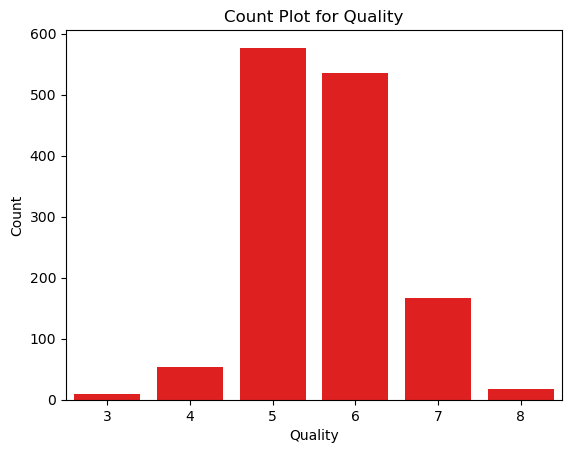

In [21]:
sns.countplot(x = 'quality', data=df, color='r')
plt.title('Count Plot for Quality')
plt.xlabel('Quality')
plt.ylabel('Count')


df.quality.value_counts()

- By observe the plot, This indicates that the majority of wine falls into the middle-range quality categories (5 and 6)while the good categories (3, 4, 7, and 8) have fewer samples..Therefore our dataset is imbalanced.We will rectify it later.

0.500    37
0.580    36
0.400    35
0.600    34
0.430    33
         ..
1.185     1
1.240     1
0.845     1
0.365     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64

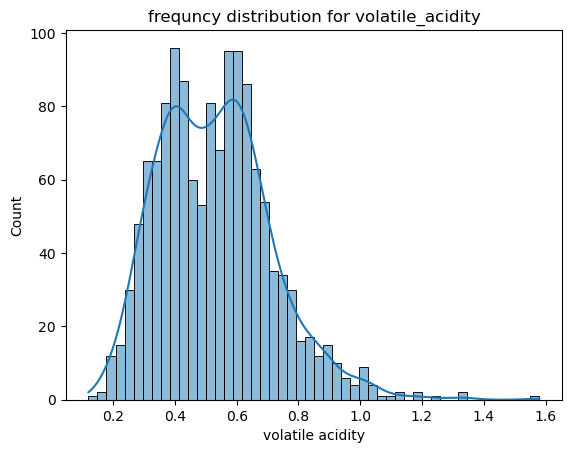

In [22]:
sns.histplot(x = 'volatile acidity', data=df, palette='viridis', kde=True, bins=50)
plt.title('frequncy distribution for volatile_acidity')
plt.xlabel('volatile acidity')
plt.ylabel('Count')

df['volatile acidity'].value_counts()

In [23]:
print(df['volatile acidity'].max())
print(df['volatile acidity'].min())

1.58
0.12


- By observe the plot,the data is skewed to right.

- Here this data is range between 0.12 to 1.58

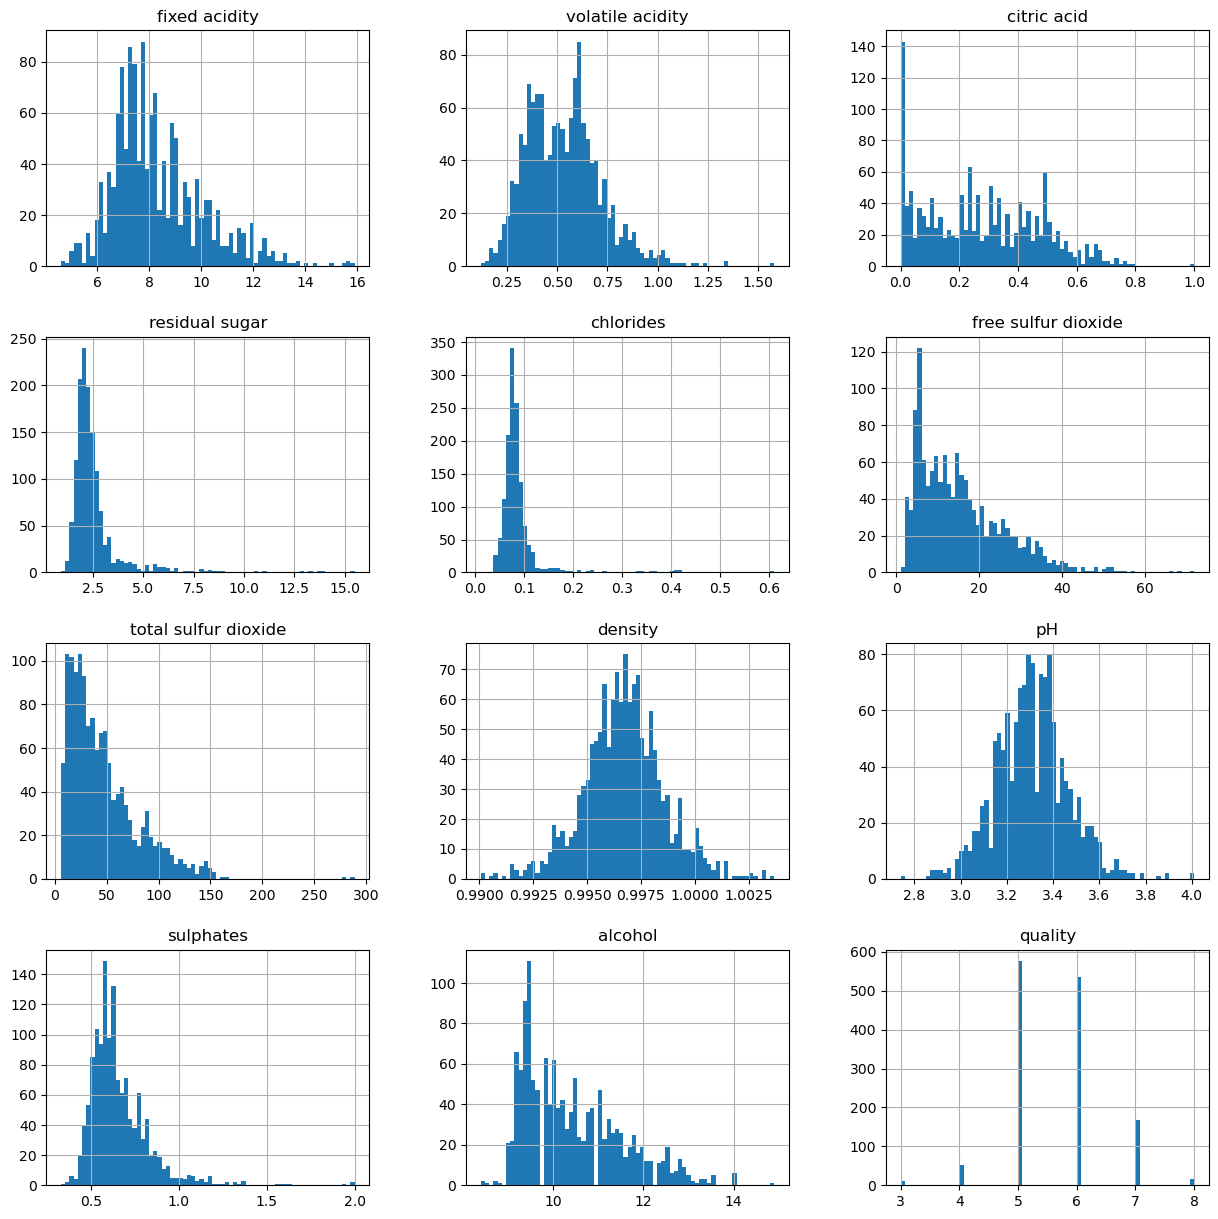

In [24]:
df.hist(bins=70,figsize=(15,15))
plt.show()

- By observe the plot, some of data columns have positive skewness.

- Here we observe pH and density column are almost normally distributed.

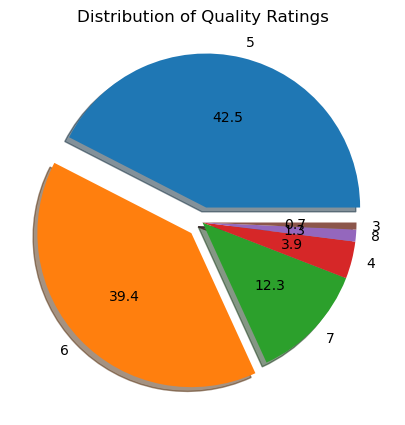

In [25]:
plt.figure(figsize=(10,5))
df['quality'].value_counts().plot(kind='pie',autopct="%1.1f",explode = (.1, .1, .0, 0,0,0),shadow=True)
plt.ylabel('')
plt.title('Distribution of Quality Ratings')
plt.show()

- By observing the pie chart,the quality rating 5 and 6 most common in our dataset 42.5% and 39.4%.

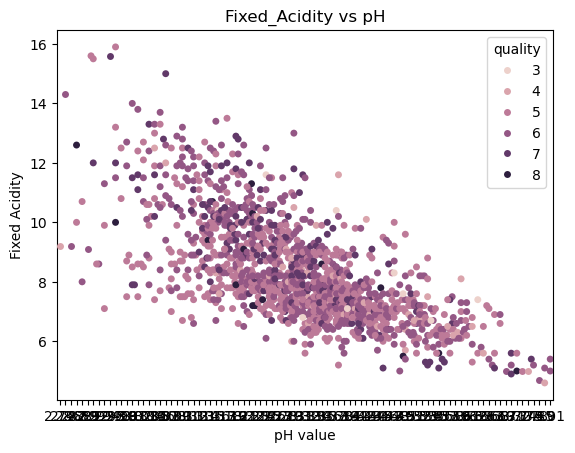

In [26]:
sns.swarmplot(x = 'pH', y='fixed acidity', data=df, hue='quality')
plt.title('Fixed_Acidity vs pH')
plt.xlabel('pH value')
plt.ylabel('Fixed Acidity')
plt.show()

- The plot shows that a negative correlation which means that when pH value is increased the fixed acidity value is  decreased.

Text(0.5, 1.0, 'Fixed_Acidity vs Citric_Acid')

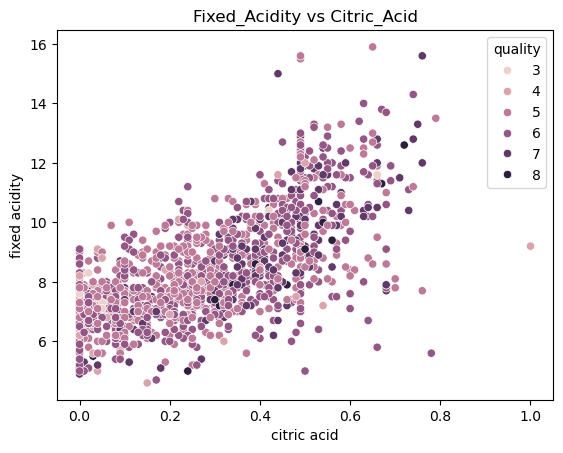

In [27]:
sns.scatterplot(x = 'citric acid', y='fixed acidity', data=df, hue='quality')
plt.title('Fixed_Acidity vs Citric_Acid')

- By obseving the plot,it indicates a clear upward trends in the datapoints between fixed acidity and citric acid.whether there is a linear relationship between fixed acidity and citric acid.

- Depending on the distribution of points there is a positive relationship which means that,citric acid increases, fixed acidity tends to increase.

- There are outliers shows in distrinution of datapoints.

Text(0.5, 1.0, 'Relation between volatile acidity vs fixed acidity')

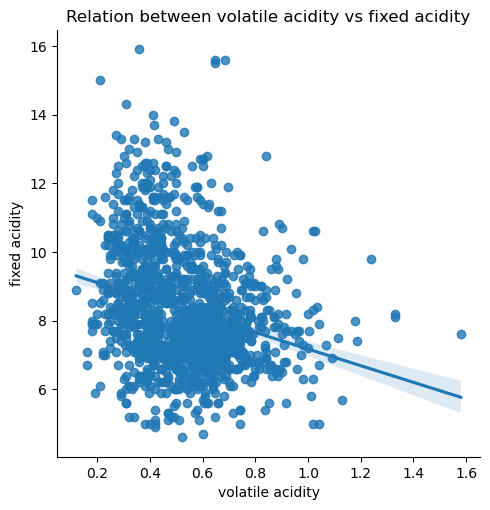

In [28]:
sns.lmplot(x = 'volatile acidity', y='fixed acidity', data=df)
plt.title('Relation between volatile acidity vs fixed acidity')

- By observing the plot, it indicates a clear downward trends in the datapoints between fixed acisity and volatile acidity wheather there is non-linear relationship.

- Depending on the plot we observe there is a negative relationship which means that,volatile acidity increases, fixed acidity tends to decrease.

- the graph shows there are many outliers present.

Text(0.5, 1.0, 'relation between fixed acidity and density')

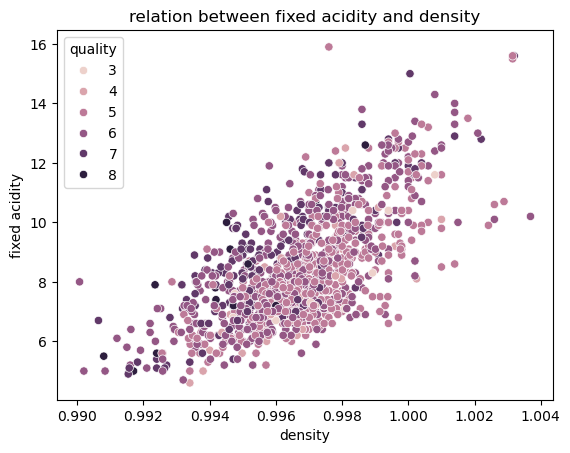

In [29]:
sns.scatterplot(x = 'density', y='fixed acidity', data=df, hue='quality')
plt.title('relation between fixed acidity and density')

- By observing the plot, it shows a strong linear realtion between fixed acidity and density where trends is upward.

- It shows positive relationship between two variables which means the fixed acidity is increased then density also increased.

Text(0.5, 1.0, 'relation between alcohol and density')

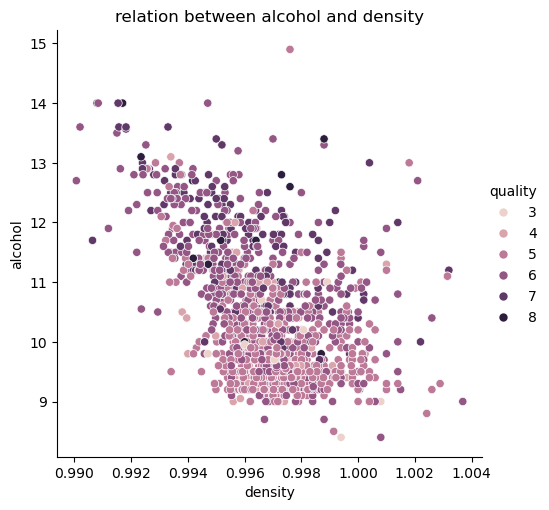

In [30]:
sns.relplot(data= df, x='density', y='alcohol', hue='quality')
plt.title('relation between alcohol and density')

- The plot shows the negative relation between alcohol and density which means alcohol percentage value decreases , density value of wine is increses.

- The trends is downward.

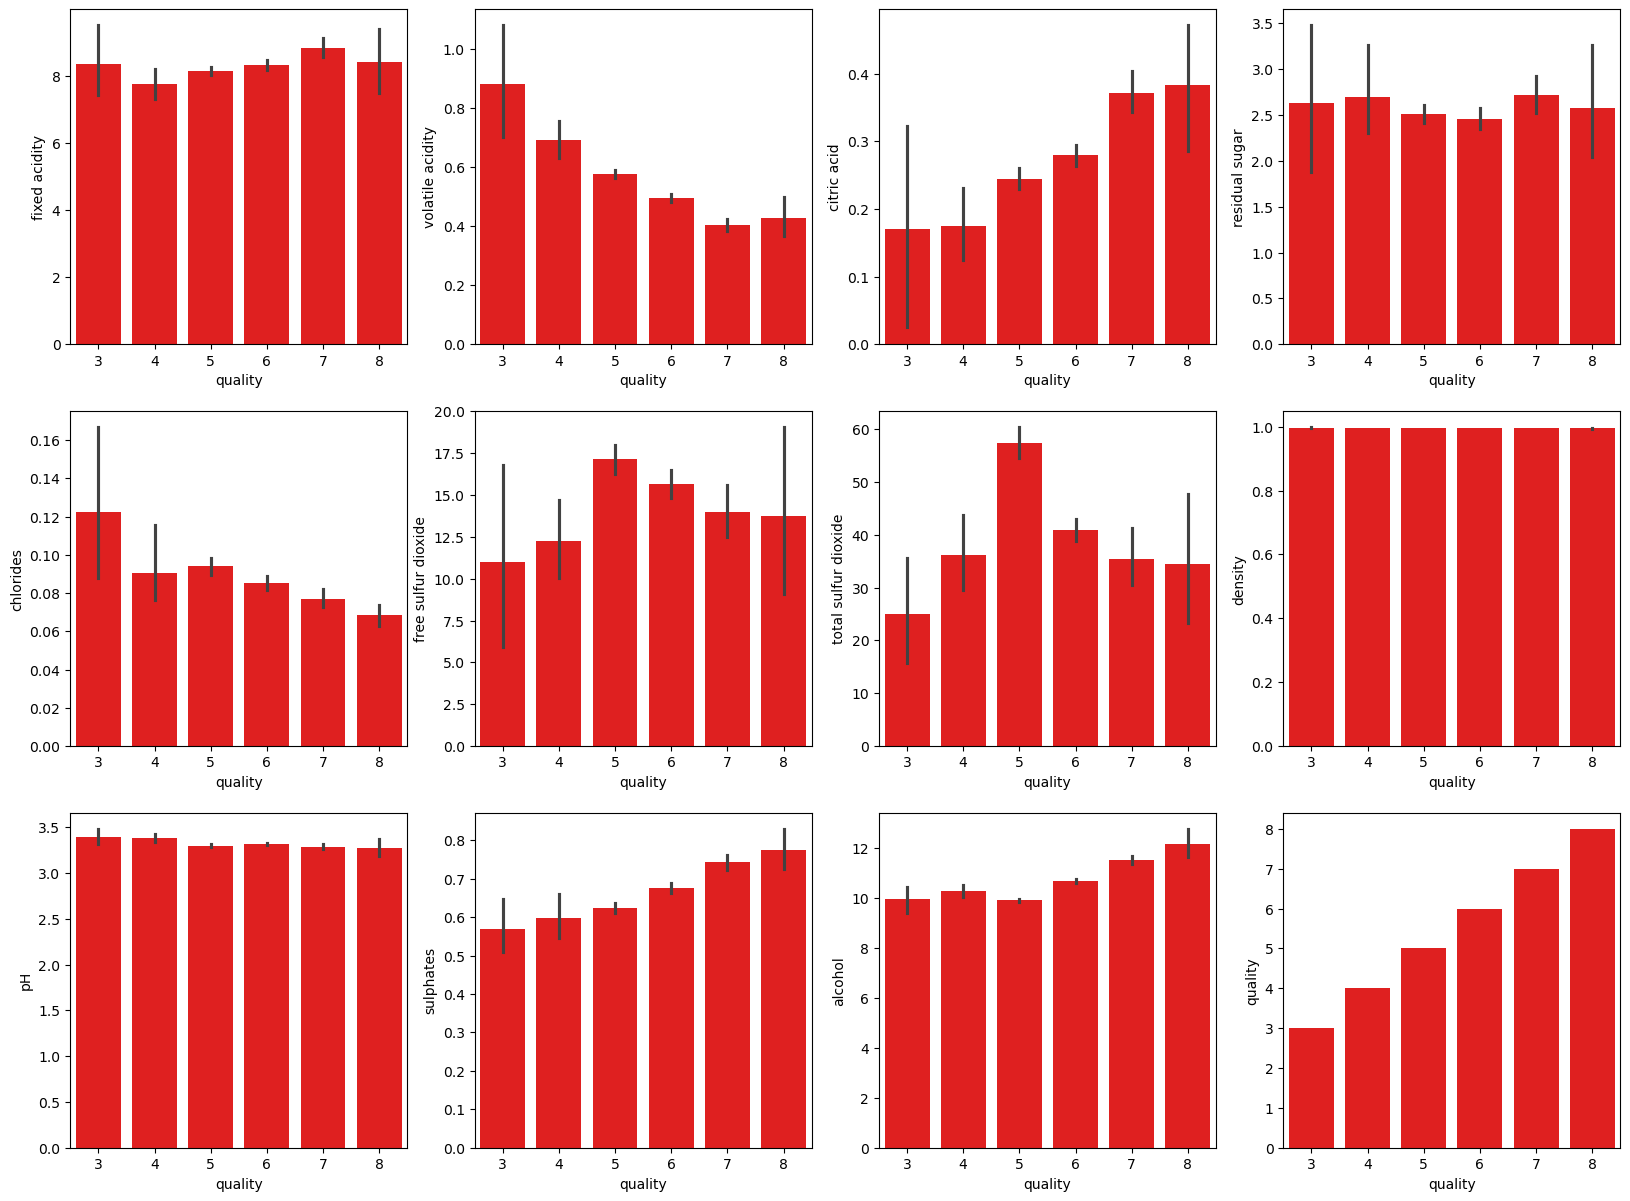

In [31]:
plt.figure(figsize=(20,20))
p = 1
for i in df.columns:
    if p <= 12:
        ax=plt.subplot(4,4,p)
        sns.barplot(x = 'quality', y = i, data=df, color='r')
    p+=1
plt.show()    

By observe the plot, we see that 

- high amount of volatile acidity is not good for better quality wine.

- high amount of salt is not good for better quality of wine.

- high amount of sulphates are good for maintain a better quality of wine.

- In average quality of wine like 5 and 6 have use high amount of sulpher dioxide.

- high amount of citric acid is present in good quality of wine.

Text(0.5, 1.0, 'multivariate analysis')

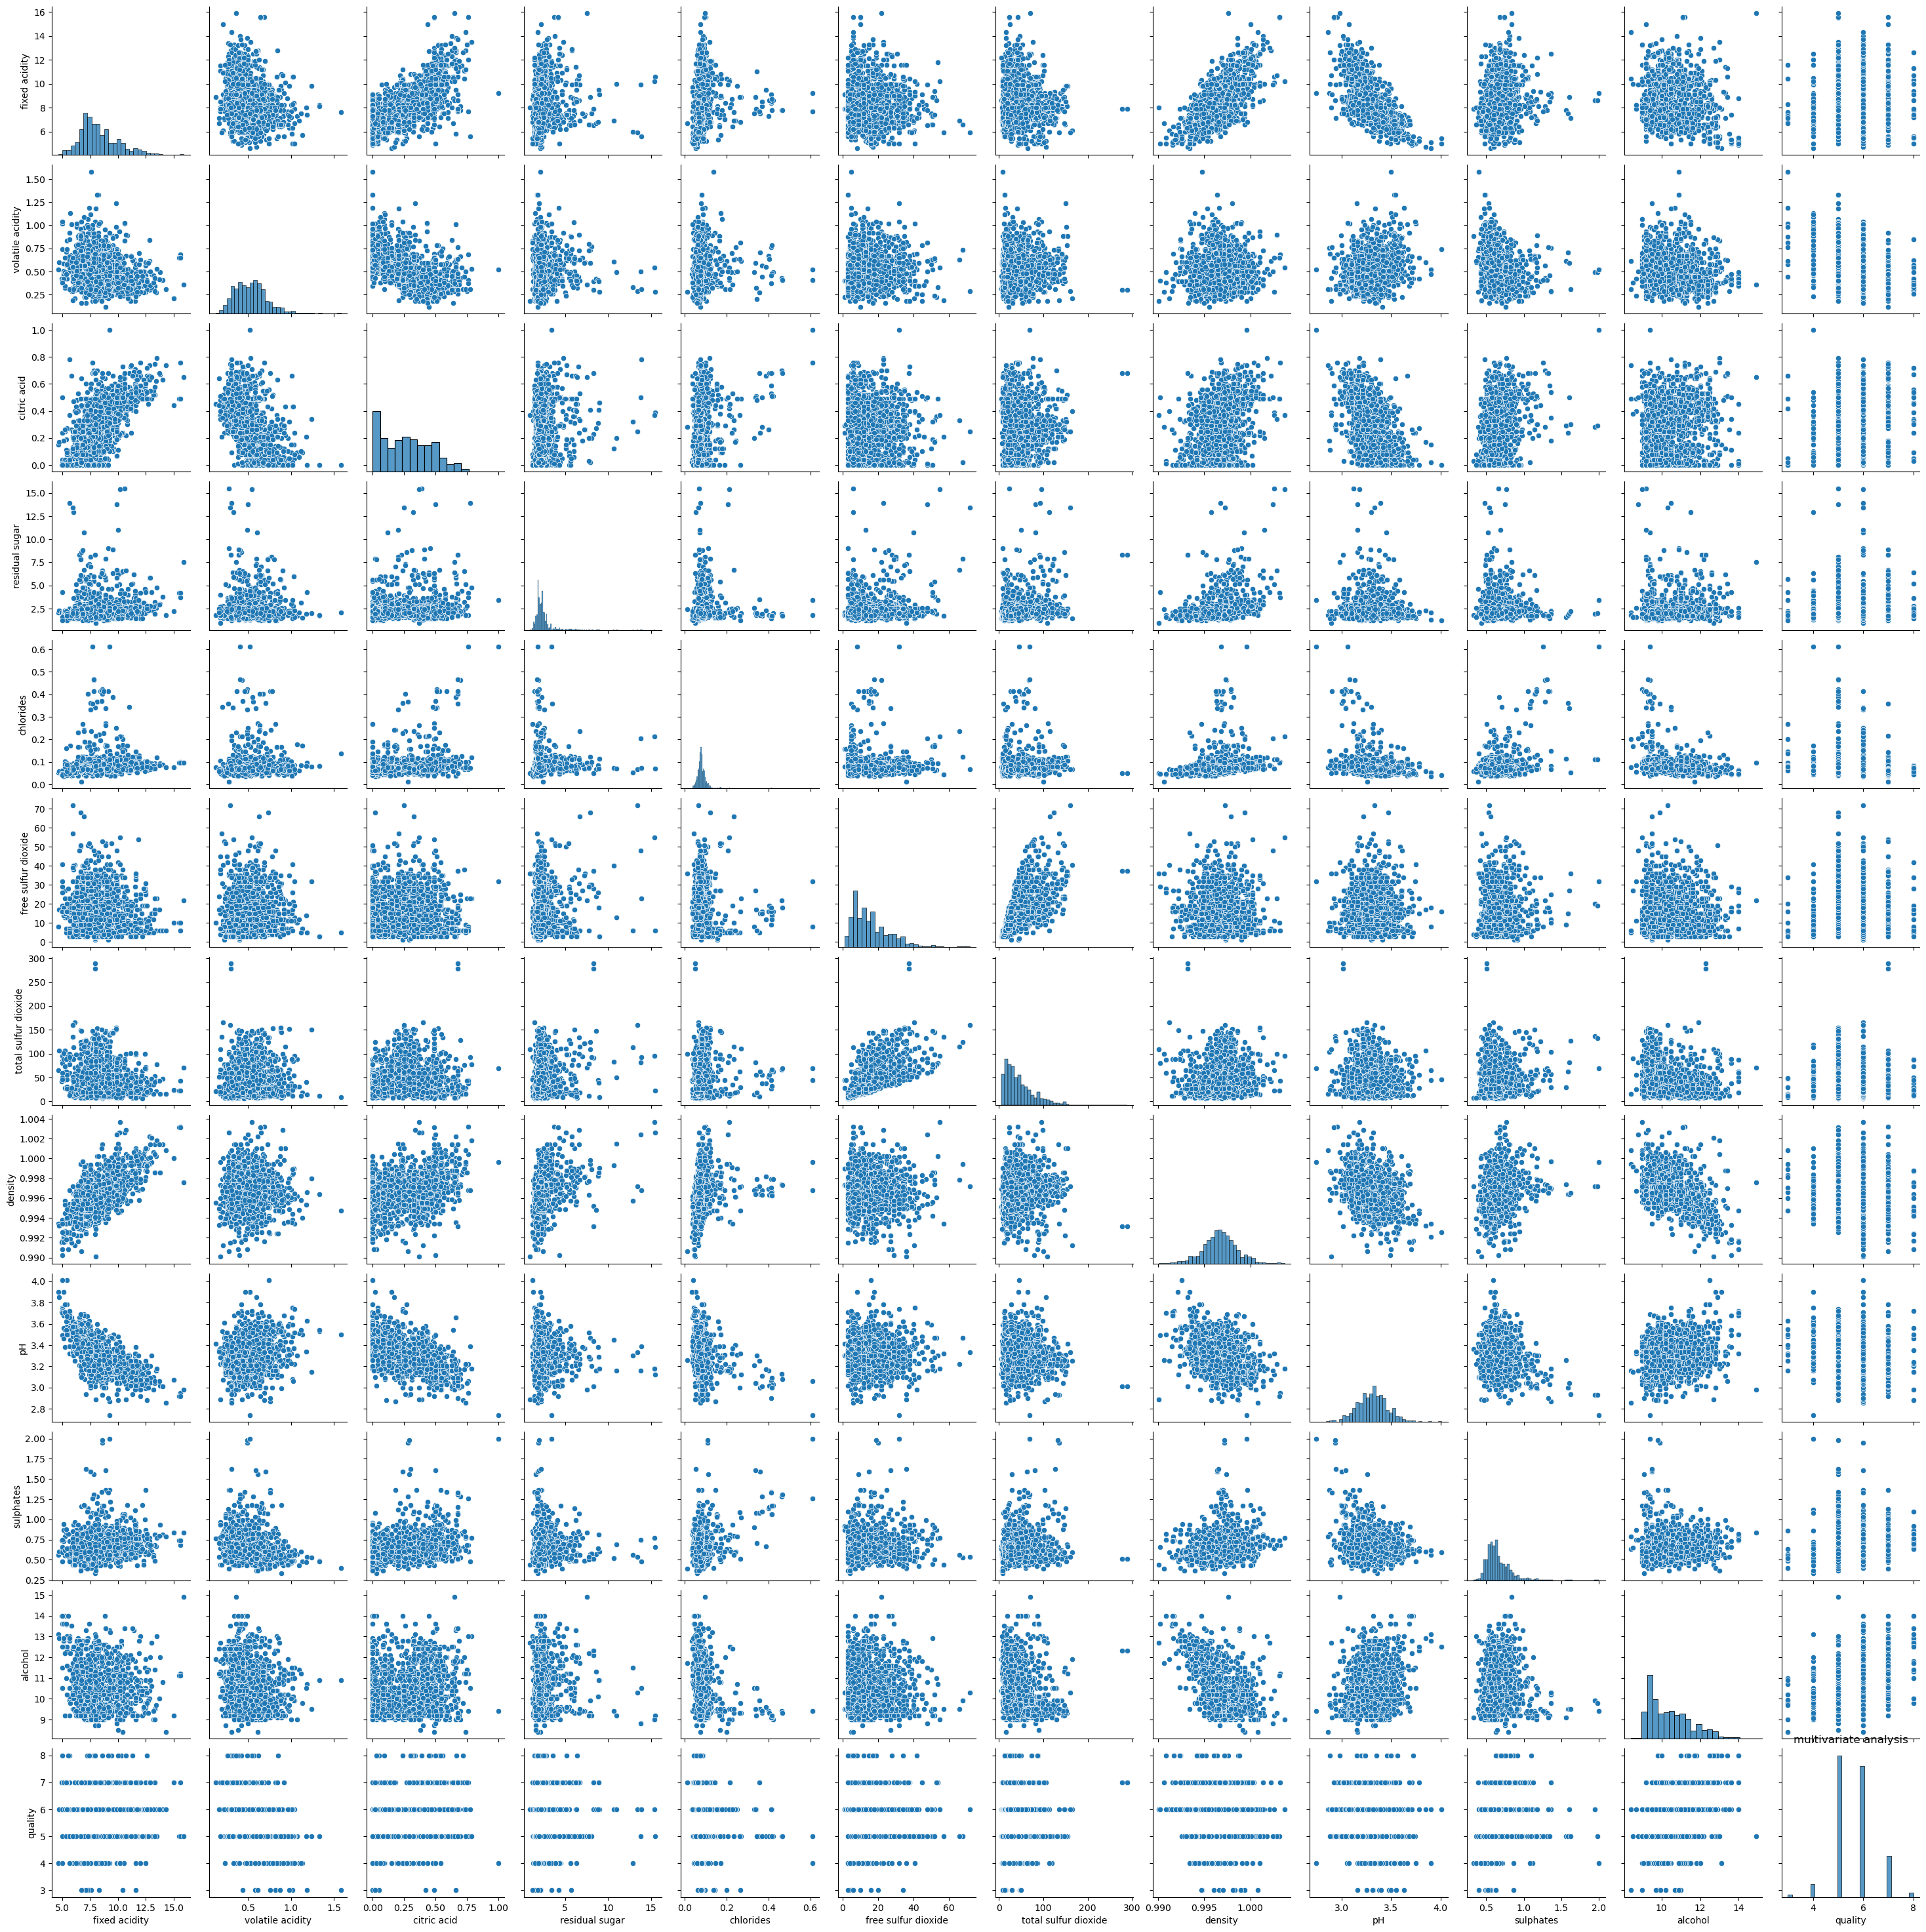

In [32]:
sns.pairplot(df)
plt.title('multivariate analysis')

The plot shows that,

- fixed acidity has a positive linear relationship with citric acid and density.
 
- fixed acidity has a negative relationship with pH.

- density has negative realtionship with alcohol.

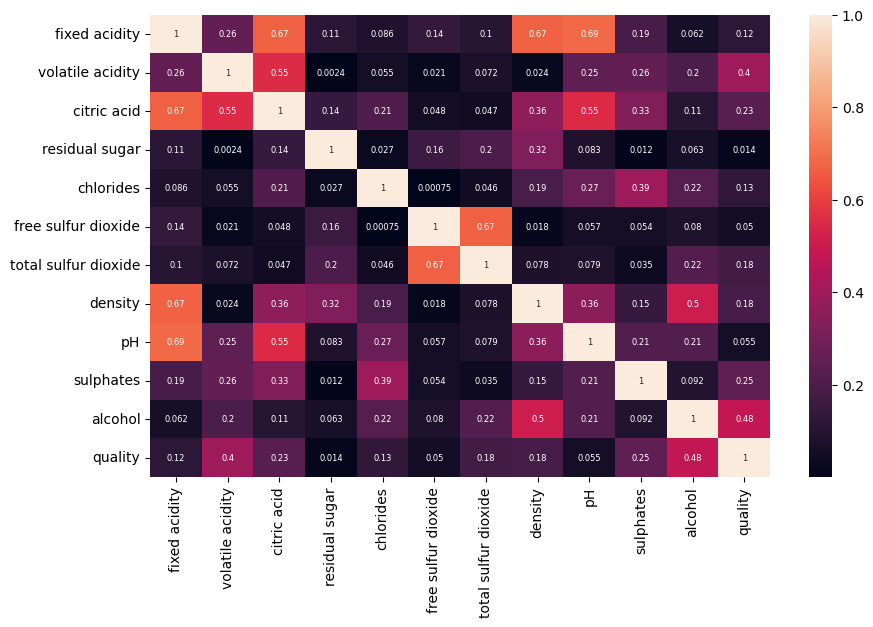

In [33]:
# Check correlation
df_corr = df.corr().abs()

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, annot_kws={'size':6})
plt.show()

In [34]:
df_corr.quality.sort_values()

residual sugar          0.013640
free sulfur dioxide     0.050463
pH                      0.055245
fixed acidity           0.119024
chlorides               0.130988
total sulfur dioxide    0.177855
density                 0.184252
citric acid             0.228057
sulphates               0.248835
volatile acidity        0.395214
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

# check outliers

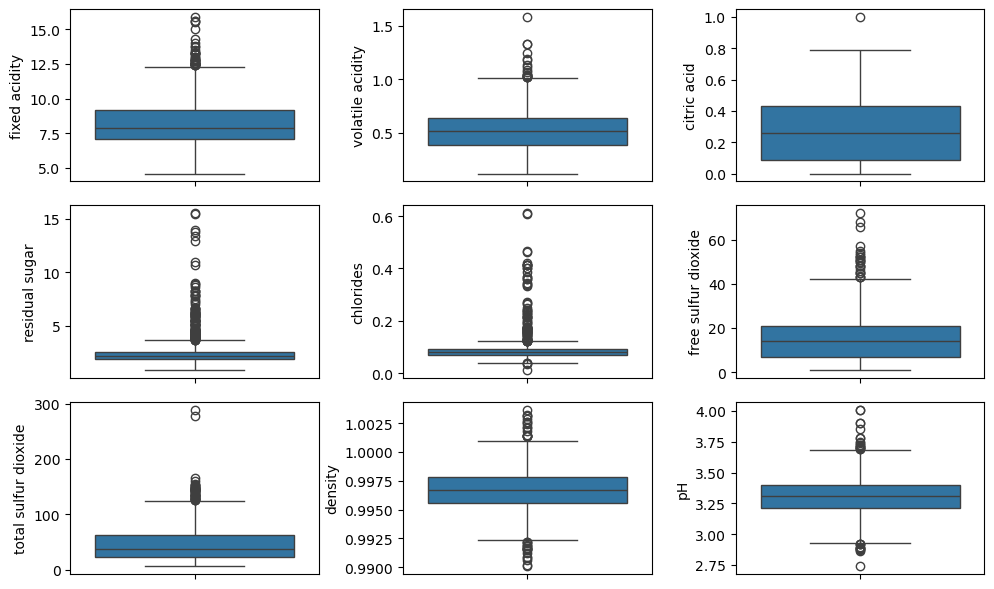

In [35]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col])
    plotnumber+=1
plt.tight_layout()    

In [36]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]))
filtered_entries = (z_scores < 3).all(axis=1)

df1 = df[filtered_entries]
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,8.306295,0.525432,0.266142,2.378692,0.081825,15.167877,44.262308,0.996683,3.313632,0.641994,10.421886,5.631961
std,1.650493,0.173001,0.191153,0.827975,0.022701,9.344298,30.019403,0.001717,0.140892,0.129866,1.038469,0.814932
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996690,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.089000,21.000000,59.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,13.500000,1.070000,0.790000,6.550000,0.236000,47.000000,147.000000,1.002200,3.750000,1.170000,13.600000,8.000000


In [37]:
((df.shape[0]-df1.shape[0])/df.shape[0])*100

8.830022075055188

- Now there are no outliers present after applying z-score except 'chlorides' and 'residual sugar','pH','density' column.We have to proceed with further step.

In [38]:
# if wine quality is 7 or above then mark it as good quality winr

df1['good_quality'] = [1 if x >= 7 else 0 for x in df1['quality']]
df1.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
1080,10.3,0.27,0.56,1.4,0.047,3.0,8.0,0.99471,3.16,0.51,11.8,6,0
1403,7.2,0.33,0.33,1.7,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8,1
755,7.8,0.91,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7,6,0
1323,9.1,0.36,0.39,1.8,0.060,21.0,55.0,0.99495,3.18,0.82,11.0,7,1
356,11.5,0.41,0.52,3.0,0.080,29.0,55.0,1.00010,3.26,0.88,11.0,5,0


In [39]:
X = df1.drop(columns=['quality','good_quality'], axis=1)
y = df1.good_quality

# Feature Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [41]:
x_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.282353,0.610526,0.000000,0.130841,0.191919,0.217391,0.198582,0.588785,0.724138,0.273810,0.192308
1,0.329412,0.800000,0.000000,0.261682,0.303030,0.521739,0.432624,0.495327,0.367816,0.416667,0.269231
2,0.329412,0.673684,0.050633,0.205607,0.272727,0.304348,0.340426,0.514019,0.436782,0.380952,0.269231
3,0.729412,0.168421,0.708861,0.130841,0.186869,0.347826,0.382979,0.607477,0.321839,0.297619,0.269231
4,0.282353,0.568421,0.000000,0.112150,0.186869,0.260870,0.241135,0.588785,0.724138,0.273810,0.192308
...,...,...,...,...,...,...,...,...,...,...,...
1234,0.211765,0.526316,0.101266,0.130841,0.151515,0.586957,0.226950,0.468224,0.620690,0.583333,0.211538
1235,0.141176,0.505263,0.101266,0.149533,0.262626,0.673913,0.269504,0.317757,0.655172,0.297619,0.403846
1236,0.105882,0.452632,0.126582,0.186916,0.121212,0.826087,0.319149,0.338318,0.735632,0.511905,0.538462
1237,0.105882,0.552632,0.151899,0.149533,0.186869,0.673913,0.269504,0.371028,0.793103,0.452381,0.346154


# Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif


select = SelectKBest(score_func=f_classif, k=6)
x_select = select.fit_transform(x_scaled, y)


scores = select.scores_

feature_names = X.columns

feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score': scores
})

top_features = feature_scores.nlargest(6, 'Score')

print(top_features)

                 Feature       Score
10               alcohol  279.181440
9              sulphates  131.691378
1       volatile acidity   93.899446
2            citric acid   58.327517
6   total sulfur dioxide   37.766070
7                density   35.259902


In [43]:
x1 = pd.DataFrame(x_select)

In [44]:
y.value_counts()

0    1070
1     169
Name: good_quality, dtype: int64

# Balance the Dataset

In [45]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x2, y1 = SM.fit_resample(x1,y)

In [46]:
y1.value_counts()

0    1070
1    1070
Name: good_quality, dtype: int64

# Check skewness

In [47]:
col_names = ['alcohol','sulphates','volatile acidity','citric acid','total sulfur dioxide','density']
x2.columns = col_names

x2.skew()

alcohol                 0.721112
sulphates              -0.029241
volatile acidity        1.442474
citric acid             0.074676
total sulfur dioxide    0.474191
density                 0.232151
dtype: float64

In [48]:
x2['volatile acidity'] = np.cbrt(x2['volatile acidity'])

In [49]:
x2.skew()

alcohol                 0.721112
sulphates              -0.029241
volatile acidity        0.270319
citric acid             0.074676
total sulfur dioxide    0.474191
density                 0.232151
dtype: float64

In [50]:
x2['alcohol'] = np.sqrt(x2['alcohol'])

In [51]:
x2.skew()

alcohol                 0.182305
sulphates              -0.029241
volatile acidity        0.270319
citric acid             0.074676
total sulfur dioxide    0.474191
density                 0.232151
dtype: float64

- There is no skewness present in our dataset now.

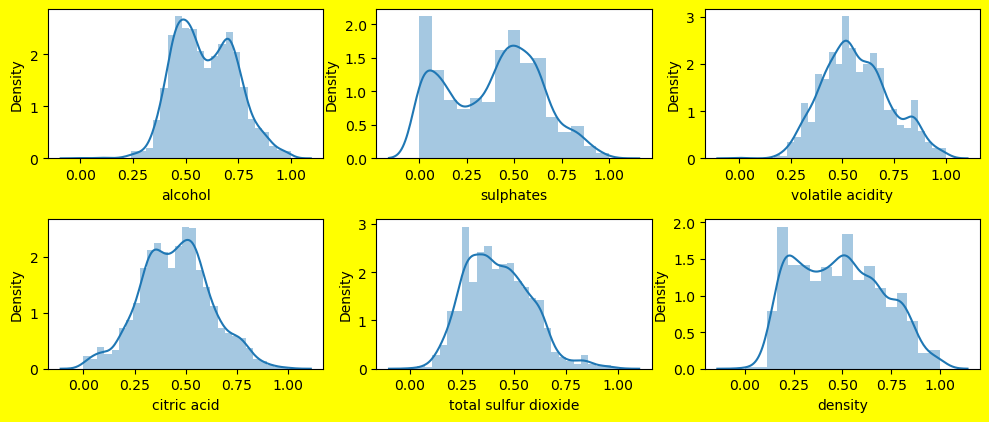

In [52]:
plt.figure(figsize=(10,6), facecolor='yellow')
plotnumber=1
for col in x2:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x2[col])
    plotnumber+=1
plt.tight_layout()

- There all columns are almost normally distributed.

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
f = x2.columns
d = {'Feature': f}
d['VIF'] = [variance_inflation_factor(x2.values, i) for i in range(len(f))]
df = pd.DataFrame(d)

df

,Feature,VIF
0,alcohol,22.778316
1,sulphates,8.601808
2,volatile acidity,13.403266
3,citric acid,19.003006
4,total sulfur dioxide,11.076825
5,density,11.284228


In [54]:
x_train,x_test,y_train,y_test = train_test_split(x2,y1,test_size= 0.25, random_state= 42)

# Model building

In [55]:
# RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)
print(rfc)

RandomForestClassifier()


In [56]:
def eval_metrics_score(clf, x_train, y_train, actual, pred):
    train_accu_score = accuracy_score(clf.predict(x_train),y_train)*100
    test_accu_score = accuracy_score(actual,pred)*100
    cm = confusion_matrix(actual,pred)
    c_report = classification_report(actual,pred)
    return train_accu_score,test_accu_score,cm,c_report

In [57]:
train_accu_score, test_accu_score, cm, c_report = eval_metrics_score(rfc, x_train, y_train, y_test, rfc_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu_score)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu_score)
print('\n------------------------------------------')
print("Confusion Matrix:\n", cm)
print('\n------------------------------------------')
print("Classification Report:\n", c_report)


------------------------------------------
Training Accuracy Score: 100.0

------------------------------------------
Test Accuracy Score: 92.14953271028037

------------------------------------------
Confusion Matrix:
 [[240  25]
 [ 17 253]]

------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       265
           1       0.91      0.94      0.92       270

    accuracy                           0.92       535
   macro avg       0.92      0.92      0.92       535
weighted avg       0.92      0.92      0.92       535



In [59]:
k_folds = KFold(n_splits=5)
score1 = cross_val_score(rfc,x2,y1,cv=k_folds)
print("Cross Validation Score : {}".format(score1))
print("\n-------------------------------------")
print("Average Cross Validation Score : {}".format(score1.mean()))
print("\n-------------------------------------")
accuracy_score(y_test,rfc_pred) - score1.mean()

Cross Validation Score : [0.89252336 0.88084112 0.78271028 0.93925234 0.9182243 ]

-------------------------------------
Average Cross Validation Score : 0.8827102803738317

-------------------------------------


0.038785046728971984

In [60]:
# GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_test)
print(gbc)

GradientBoostingClassifier()


In [61]:
train_accu_score, test_accu_score, cm, c_report = eval_metrics_score(gbc, x_train, y_train, y_test, gbc_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu_score)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu_score)
print('\n------------------------------------------')
print("Confusion Matrix:\n", cm)
print('\n------------------------------------------')
print("Classification Report:\n", c_report)


------------------------------------------
Training Accuracy Score: 93.89408099688474

------------------------------------------
Test Accuracy Score: 89.53271028037383

------------------------------------------
Confusion Matrix:
 [[231  34]
 [ 22 248]]

------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       265
           1       0.88      0.92      0.90       270

    accuracy                           0.90       535
   macro avg       0.90      0.90      0.90       535
weighted avg       0.90      0.90      0.90       535



In [62]:
k_folds = KFold(n_splits=5)
score2 = cross_val_score(gbc,x2,y1,cv=k_folds)
print("Cross Validation Score : {}".format(score2))
print("\n-------------------------------------")
print("Average Cross Validation Score : {}".format(score2.mean()))
print("\n-------------------------------------")
accuracy_score(y_test,gbc_pred) - score2.mean()

Cross Validation Score : [0.85981308 0.84345794 0.74065421 0.90420561 0.88551402]

-------------------------------------
Average Cross Validation Score : 0.8467289719626168

-------------------------------------


0.04859813084112152

In [63]:
# ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
etc_pred = etc.predict(x_test)
print(etc)

ExtraTreesClassifier()


In [64]:
train_accu_score, test_accu_score, cm, c_report = eval_metrics_score(etc, x_train, y_train, y_test, etc_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu_score)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu_score)
print('\n------------------------------------------')
print("Confusion Matrix:\n", cm)
print('\n------------------------------------------')
print("Classification Report:\n", c_report)


------------------------------------------
Training Accuracy Score: 100.0

------------------------------------------
Test Accuracy Score: 94.2056074766355

------------------------------------------
Confusion Matrix:
 [[241  24]
 [  7 263]]

------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       265
           1       0.92      0.97      0.94       270

    accuracy                           0.94       535
   macro avg       0.94      0.94      0.94       535
weighted avg       0.94      0.94      0.94       535



In [65]:
k_folds = KFold(n_splits=5)
score3 = cross_val_score(etc,x2,y1,cv=k_folds)
print("Cross Validation Score : {}".format(score3))
print("\n-------------------------------------")
print("Average Cross Validation Score : {}".format(score3.mean()))
print("\n-------------------------------------")
accuracy_score(y_test,etc_pred) - score3.mean()

Cross Validation Score : [0.89719626 0.89485981 0.79205607 0.95093458 0.94158879]

-------------------------------------
Average Cross Validation Score : 0.8953271028037383

-------------------------------------


0.04672897196261683

In [66]:
# DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
print(dtc)

DecisionTreeClassifier()


In [67]:
train_accu_score, test_accu_score, cm, c_report = eval_metrics_score(dtc, x_train, y_train, y_test, dtc_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu_score)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu_score)
print('\n------------------------------------------')
print("Confusion Matrix:\n", cm)
print('\n------------------------------------------')
print("Classification Report:\n", c_report)


------------------------------------------
Training Accuracy Score: 100.0

------------------------------------------
Test Accuracy Score: 86.91588785046729

------------------------------------------
Confusion Matrix:
 [[226  39]
 [ 31 239]]

------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87       265
           1       0.86      0.89      0.87       270

    accuracy                           0.87       535
   macro avg       0.87      0.87      0.87       535
weighted avg       0.87      0.87      0.87       535



In [68]:
k_folds = KFold(n_splits=5)
score4 = cross_val_score(dtc,x2,y1,cv=k_folds)
print("Cross Validation Score : {}".format(score4))
print("Average Cross Validation Score : {}".format(score4.mean()))
print("\n------------------")
accuracy_score(y_test,dtc_pred) - score4.mean()

Cross Validation Score : [0.86682243 0.84579439 0.73831776 0.87850467 0.83878505]
Average Cross Validation Score : 0.833644859813084

------------------


0.03551401869158888

In [69]:
# LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
print(lr)

LogisticRegression()


In [70]:
train_accu_score, test_accu_score, cm, c_report = eval_metrics_score(lr, x_train, y_train, y_test, lr_pred)
print('\n------------------------------------------')
print("Training Accuracy Score:", train_accu_score)
print('\n------------------------------------------')
print("Test Accuracy Score:", test_accu_score)
print('\n------------------------------------------')
print("Confusion Matrix:\n", cm)
print('\n------------------------------------------')
print("Classification Report:\n", c_report)


------------------------------------------
Training Accuracy Score: 81.93146417445483

------------------------------------------
Test Accuracy Score: 79.43925233644859

------------------------------------------
Confusion Matrix:
 [[203  62]
 [ 48 222]]

------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       265
           1       0.78      0.82      0.80       270

    accuracy                           0.79       535
   macro avg       0.80      0.79      0.79       535
weighted avg       0.80      0.79      0.79       535



In [71]:
k_folds = KFold(n_splits=5)
score5 = cross_val_score(lr,x2,y1,cv=k_folds)
print("Cross Validation Score : {}".format(score5))
print("Average Cross Validation Score : {}".format(score5.mean()))
print("\n------------------")
accuracy_score(y_test,lr_pred) - score5.mean()

Cross Validation Score : [0.76869159 0.78504673 0.67990654 0.79205607 0.74299065]
Average Cross Validation Score : 0.7537383177570092

------------------


0.04065420560747679

# result

In [72]:
model_res= pd.DataFrame({
    'Model' : ['RandomForest','GradientBoosting','ExtraTress','DecisionTree','Logistic Regression'],
    'Predicted Score' : [accuracy_score(y_test,rfc_pred),
              accuracy_score(y_test,gbc_pred),
              accuracy_score(y_test,etc_pred),
              accuracy_score(y_test,dtc_pred),
              accuracy_score(y_test,lr_pred)],
    'Validation Score' : [score1.mean(),
                               score2.mean(),
                               score3.mean(),
                               score4.mean(),
                               score5.mean()],
    'Difference' : [accuracy_score(y_test,rfc_pred) - score1.mean(),
                   accuracy_score(y_test,gbc_pred) - score2.mean(),
                   accuracy_score(y_test,etc_pred) - score3.mean(),
                   accuracy_score(y_test,dtc_pred) - score4.mean(),
                   accuracy_score(y_test,lr_pred) - score5.mean()]
})

In [73]:
model_res

,Model,Predicted Score,Validation Score,Difference
0,RandomForest,0.921495,0.882710,0.038785
1,GradientBoosting,0.895327,0.846729,0.048598
2,ExtraTress,0.942056,0.895327,0.046729
3,DecisionTree,0.869159,0.833645,0.035514
4,Logistic Regression,0.794393,0.753738,0.040654


# - From the difference of both accuracy score and cross validation score we can conclude that "Decision Tree Classifier" is our best fit and best performing model

In [74]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'min_samples_split': [1,2,5],
    'min_samples_leaf': [1,2,3],
    'max_features' : ['sqrt', 'log2']
}

In [75]:
DT = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [76]:
DT.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 5],
                         'splitter': ['best', 'random']})

In [77]:
DT.best_params_

{'criterion': 'gini',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
DT.best_score_*100

In [78]:
dt = DecisionTreeClassifier(criterion='gini', max_features='log2', min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('Training Accuracy : {}'.format(accuracy_score(dt.predict(x_train),y_train)*100))
print('\n--------------------------------------------')
print('Testing Accuracy : {}'.format(accuracy_score(y_test,y_pred)*100))
print('\n')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Training Accuracy : 100.0

--------------------------------------------
Testing Accuracy : 88.41121495327103


[[232  33]
 [ 29 241]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       265
           1       0.88      0.89      0.89       270

    accuracy                           0.88       535
   macro avg       0.88      0.88      0.88       535
weighted avg       0.88      0.88      0.88       535



# Compare actual and predicted value

In [79]:
actual = np.array(y_test)

In [80]:
pd.DataFrame({
    'Actual' : actual,
    'Prediction' : y_pred
})

,Actual,Prediction
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
530,0,0
531,1,1
532,0,0
533,0,0


In [81]:
# Save the model
import joblib

joblib.dump(dt,'Red Wine Predictions.pkl')

['Red Wine Predictions.pkl']